# **Testing the Auction module**

In [15]:
import sys
import numpy as np
from importlib import reload
sys.path.append("../")

import auction
reload(auction)

<module 'auction' from '../auction.py'>

## **Functionality testing**

### Small sample

In [16]:
starting_prices = np.random.normal(300, 15, 10)

def preference_function(buyer_id, auction_ids, current_prices):
    return np.argmin(current_prices)

In [17]:
auctions = [auction.Auctioneer(starting_prices[i], 10, "auc%d"%i) for i in range(10)]
buyers = [auction.Buyer(auctions, 5000, preference_function, "buy%d"%i) for i in range(10)]

In [18]:
result = auction.run_auctions(auctions, buyers)

In [19]:
result

[{'auction_id': 'auc3', 'buyer_id': 'buy2', 'price': 291.0368101001911},
 {'auction_id': 'auc4', 'buyer_id': 'buy3', 'price': 293.364123579862},
 {'auction_id': 'auc0', 'buyer_id': 'buy6', 'price': 303.5627206499262},
 {'auction_id': 'auc1', 'buyer_id': 'buy8', 'price': 305.91692306865014},
 {'auction_id': 'auc7', 'buyer_id': 'buy7', 'price': 303.6941795235478},
 {'auction_id': 'auc9', 'buyer_id': 'buy5', 'price': 303.48500705711564},
 {'auction_id': 'auc2', 'buyer_id': 'buy1', 'price': 337.34809057020846},
 {'auction_id': 'auc5', 'buyer_id': 'buy4', 'price': 338.1047951980374},
 {'auction_id': 'auc6', 'buyer_id': 'buy0', 'price': 333.0740805534002},
 {'auction_id': 'auc8', 'buyer_id': 'buy9', 'price': 339.88755649767035}]

### Bigger sample

In [20]:
starting_prices = np.random.normal(300, 15, 400)
auctions = [auction.Auctioneer(starting_prices[i], 10, "auc%d"%i) for i in range(200)]
buyers = [auction.Buyer(auctions, 5000, preference_function, "buy%d"%i) for i in range(200)]

In [21]:
result = auction.run_auctions(auctions, buyers)

In [23]:
successful_buyers = []
for r in result:
    if r["buyer_id"] in successful_buyers: raise(ValueError)
    successful_buyers.append(r["buyer_id"])

Text(0, 0.5, 'occurance')

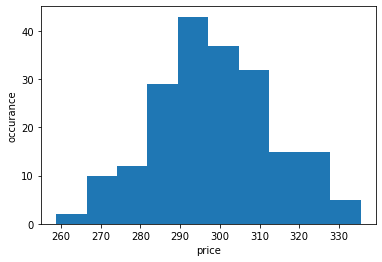

In [24]:
import matplotlib.pyplot as plt

prices = []
for r in result:
    prices.append(r["price"])
    
plt.hist(prices)
plt.xlabel("price")
plt.ylabel("occurance")

## **Asymmetric test cases**

### #buyers > #items

In [25]:
starting_prices = np.random.normal(300, 15, 30)
auctions = [auction.Auctioneer(starting_prices[i], 10, "auc%d"%i) for i in range(30)]
buyers = [auction.Buyer(auctions, 5000, preference_function, "buy%d"%i) for i in range(100)]

In [26]:
result = auction.run_auctions(auctions, buyers)

In [27]:
successful_buyers = []
for r in result:
    if r["buyer_id"] in successful_buyers: raise(ValueError)
    successful_buyers.append(r["buyer_id"])

Text(0, 0.5, 'occurance')

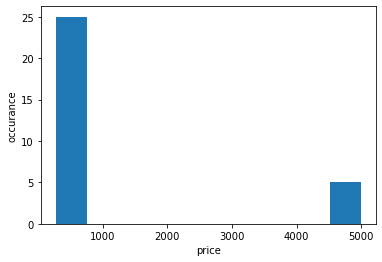

In [28]:
import matplotlib.pyplot as plt

prices = []
for r in result:
    prices.append(r["price"])
    
plt.hist(prices)
plt.xlabel("price")
plt.ylabel("occurance")

### #buyers < #items

In [29]:
starting_prices = np.random.normal(300, 15, 50)
auctions = [auction.Auctioneer(starting_prices[i], 10, "auc%d"%i) for i in range(50)]
buyers = [auction.Buyer(auctions, 5000, preference_function, "buy%d"%i) for i in range(30)]

In [30]:
result = auction.run_auctions(auctions, buyers)

In [31]:
result

[{'auction_id': 'auc30', 'buyer_id': 'buy1', 'price': 267.7459025763495},
 {'auction_id': 'auc33', 'buyer_id': 'buy2', 'price': 269.4847314089553},
 {'auction_id': 'auc45', 'buyer_id': 'buy0', 'price': 266.46558943847504},
 {'auction_id': 'auc1', 'buyer_id': 'buy4', 'price': 278.05417057548794},
 {'auction_id': 'auc13', 'buyer_id': 'buy6', 'price': 279.5124085897559},
 {'auction_id': 'auc36', 'buyer_id': 'buy5', 'price': 279.36701339231405},
 {'auction_id': 'auc7', 'buyer_id': 'buy8', 'price': 283.3121758712705},
 {'auction_id': 'auc12', 'buyer_id': 'buy3', 'price': 280.6159153083878},
 {'auction_id': 'auc14', 'buyer_id': 'buy9', 'price': 285.72690791918603},
 {'auction_id': 'auc28', 'buyer_id': 'buy10', 'price': 287.77253004966366},
 {'auction_id': 'auc29', 'buyer_id': 'buy7', 'price': 283.06824068280184},
 {'auction_id': 'auc24', 'buyer_id': 'buy11', 'price': 288.01830418163644},
 {'auction_id': 'auc40', 'buyer_id': 'buy13', 'price': 289.6482675678544},
 {'auction_id': 'auc43', 'buye

Text(0, 0.5, 'occurance')

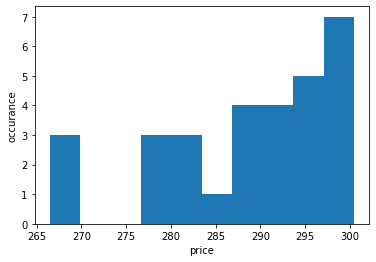

In [32]:
import matplotlib.pyplot as plt

prices = []
for r in result:
    prices.append(r["price"])
    
plt.hist(prices)
plt.xlabel("price")
plt.ylabel("occurance")